In [1]:
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Toufique\\2022-ml-all'

In [4]:
os.listdir()

['.ipynb_checkpoints', 'mnist-dataset', 'mnist.ipynb']

In [5]:
X_test_source = 'mnist-dataset/test_images.gz'
y_test_source = 'mnist-dataset/t10k-labels-idx1-ubyte.gz'
X_train_source = 'mnist-dataset/train-images-idx3-ubyte.gz'
y_train_source = 'mnist-dataset/train-labels-idx1-ubyte.gz'

In [6]:
import gzip

In [7]:
def image_process(file_name):
    with gzip.open(file_name) as file:
        data = np.frombuffer(file.read(), np.int8, offset = 16)
        data = data/255
        return data.reshape(-1, 28,28)
        

In [8]:
X_test = image_process(X_test_source)
X_train = image_process(X_train_source)

In [9]:
def label_process(file_path):
    with gzip.open(file_path) as file:
        data = np.frombuffer(file.read(), np.int8, offset = 8)
        return data

In [10]:
y_train = label_process(y_train_source)
y_test = label_process(y_test_source)

In [11]:
y_train.shape, X_train.shape

((60000,), (60000, 28, 28))

In [12]:
y_test.shape, X_test.shape

((10000,), (10000, 28, 28))

In [44]:
#visualtization

In [45]:
import matplotlib.pyplot as plt

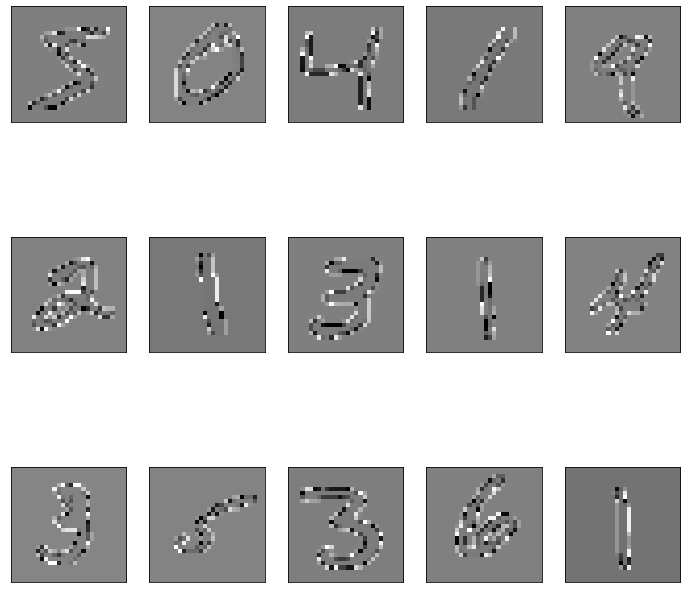

In [56]:
fig = plt.figure(figsize=(12,12))
# ax = fig.imshow(X_train[0])
for i in range(15):
    ax = plt.subplot(3,5,i+1)
    ax.imshow(X_train[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [61]:
X_train[0].shape

(28, 28)

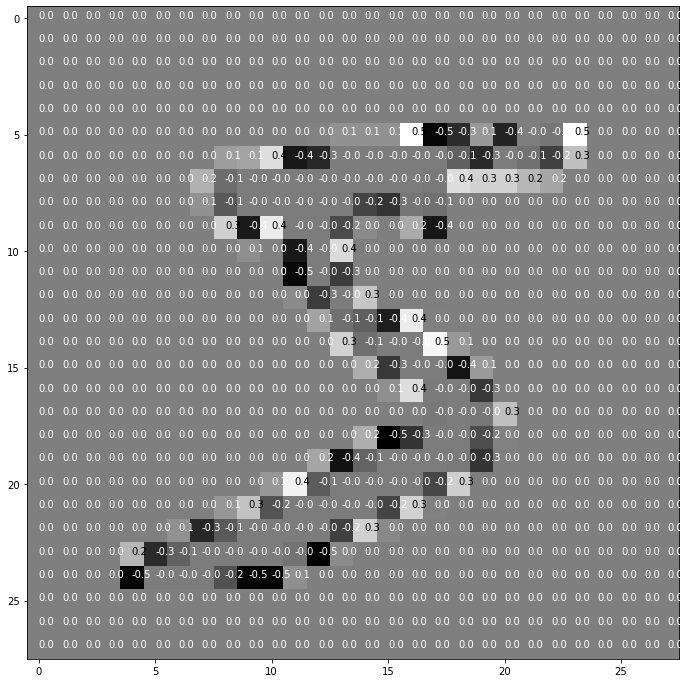

In [63]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(X_train[0], cmap = 'gray')
w, h = X_train[0].shape
thresh = X_train[0].max()/2.5
for row in range(w):
    for col in range(h):
        ax.annotate(round(X_train[0][row][col],1), xy=(col, row), color = 'black' if X_train[0][row][col] > thresh else 'white' )


In [ ]:
#valiadtion set preparation

In [13]:
shuffle_indices = np.random.permutation(X_train.shape[0])
val_indices_length = int(X_train.shape[0]*0.2)
X_train_indices = shuffle_indices[val_indices_length:]
X_val_indices = shuffle_indices[:val_indices_length]

In [14]:
X_val = X_train[X_val_indices]
y_val = y_train[X_val_indices]
X_train = X_train[X_train_indices]
y_train = y_train[X_train_indices]

In [15]:
#model creation

In [16]:
import tensorflow as tf

# functional API

In [ ]:
#it needs 3 layers inputs, dense and output

In [18]:
input_layers = tf.keras.layers.Input(shape=(28*28,))
x = tf.keras.layers.Dense(120, activation='relu')(input_layers)
x = tf.keras.layers.Dense(240, activation='relu')(x)
output_layers = tf.keras.layers.Dense(10, activation ='softmax')(x)

In [19]:
model = tf.keras.Model(inputs= input_layers, outputs = output_layers, name= 'ai')

In [20]:
model.summary()

Model: "ai"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 120)               94200     
                                                                 
 dense_4 (Dense)             (None, 240)               29040     
                                                                 
 dense_5 (Dense)             (None, 10)                2410      
                                                                 
Total params: 125,650
Trainable params: 125,650
Non-trainable params: 0
_________________________________________________________________


In [21]:
X_train_r = X_train.reshape(-1, 784)
X_val_r = X_val.reshape(-1, 784)
X_test_r = X_test.reshape(-1, 784)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train_r, y_train, validation_data=(X_val_r, y_val), epochs=10, verbose=2 )

Epoch 1/10
1500/1500 - 5s - loss: 1.6671 - accuracy: 0.4142 - val_loss: 1.2875 - val_accuracy: 0.5469 - 5s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 1.0073 - accuracy: 0.6508 - val_loss: 1.0638 - val_accuracy: 0.6327 - 4s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.7325 - accuracy: 0.7475 - val_loss: 1.0223 - val_accuracy: 0.6622 - 4s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.5705 - accuracy: 0.8037 - val_loss: 1.0617 - val_accuracy: 0.6653 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.4618 - accuracy: 0.8414 - val_loss: 1.1031 - val_accuracy: 0.6758 - 4s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.3765 - accuracy: 0.8677 - val_loss: 1.2159 - val_accuracy: 0.6692 - 4s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.3081 - accuracy: 0.8932 - val_loss: 1.2996 - val_accuracy: 0.6698 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2625 - accuracy: 0.9082 - val_loss: 1.4239 - val_accuracy: 0.6638 - 4s/epoch - 2ms/step
Epoch 9/

In [114]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [115]:
model.fit(X_train_r, y_train, validation_data=(X_val_r, y_val), epochs=10, verbose=2 )

Epoch 1/10


c:\users\toufique\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 - 4s - loss: 0.1855 - accuracy: 0.9357 - val_loss: 1.7652 - val_accuracy: 0.6640 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.1352 - accuracy: 0.9543 - val_loss: 1.8781 - val_accuracy: 0.6669 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.1248 - accuracy: 0.9574 - val_loss: 1.9928 - val_accuracy: 0.6675 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.1150 - accuracy: 0.9605 - val_loss: 2.1087 - val_accuracy: 0.6601 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.1029 - accuracy: 0.9647 - val_loss: 2.1815 - val_accuracy: 0.6614 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.0928 - accuracy: 0.9672 - val_loss: 2.2788 - val_accuracy: 0.6629 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.0855 - accuracy: 0.9711 - val_loss: 2.4046 - val_accuracy: 0.6633 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.0798 - accuracy: 0.9726 - val_loss: 2.4334 - val_accuracy: 0.6617 - 4s/epoch - 3ms/step
Epoch 9/10
1500/150

In [120]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
#if we used softmax activation function then we can not use from_logits= True rather it will be false 

In [121]:
model.fit(X_train_r, y_train, validation_data=(X_val_r, y_val), epochs=10, verbose=2 )

Epoch 1/10
1500/1500 - 4s - loss: 0.0754 - accuracy: 0.9734 - val_loss: 2.7100 - val_accuracy: 0.6629 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.0546 - accuracy: 0.9817 - val_loss: 2.8150 - val_accuracy: 0.6683 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.0560 - accuracy: 0.9808 - val_loss: 2.8528 - val_accuracy: 0.6683 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.0536 - accuracy: 0.9817 - val_loss: 2.9205 - val_accuracy: 0.6664 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.0561 - accuracy: 0.9799 - val_loss: 2.9486 - val_accuracy: 0.6645 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.0491 - accuracy: 0.9842 - val_loss: 3.0028 - val_accuracy: 0.6656 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.0511 - accuracy: 0.9821 - val_loss: 3.0443 - val_accuracy: 0.6660 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.0488 - accuracy: 0.9835 - val_loss: 3.1072 - val_accuracy: 0.6635 - 4s/epoch - 3ms/step
Epoch 9/

In [107]:
X_train.shape

(48000, 28, 28)

# Sequential model

In [ ]:
#sequential model --> needs a flatten layer, and dense layers

In [24]:
X_train_s = X_train.reshape(-1, 1, 28,28)
X_test_s = X_test.reshape(-1,1, 28,28)
X_val_s = X_val.reshape(-1, 1, 28,28)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (1, 28,28)),
    tf.keras.layers.Dense(120, activation ='relu'),
    tf.keras.layers.Dense(240, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
    
])

In [152]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [153]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 120)               94200     
                                                                 
 dense_34 (Dense)            (None, 240)               29040     
                                                                 
 dense_35 (Dense)            (None, 10)                2410      
                                                                 
Total params: 125,650
Trainable params: 125,650
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), verbose=2,epochs=10)

Epoch 1/10
1500/1500 - 4s - loss: 1.5806 - accuracy: 0.4353 - val_loss: 1.3333 - val_accuracy: 0.5253 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 1.1007 - accuracy: 0.6138 - val_loss: 1.1771 - val_accuracy: 0.5953 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.8858 - accuracy: 0.6916 - val_loss: 1.1742 - val_accuracy: 0.6066 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.7536 - accuracy: 0.7372 - val_loss: 1.2016 - val_accuracy: 0.6244 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.6639 - accuracy: 0.7712 - val_loss: 1.2091 - val_accuracy: 0.6363 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.5835 - accuracy: 0.7996 - val_loss: 1.2630 - val_accuracy: 0.6313 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.5328 - accuracy: 0.8165 - val_loss: 1.3390 - val_accuracy: 0.6355 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.4867 - accuracy: 0.8330 - val_loss: 1.3806 - val_accuracy: 0.6332 - 4s/epoch - 3ms/step
Epoch 9/

# Sequential model in another way

In [31]:
X_train[0].shape

(28, 28)

In [34]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape = (X_train[0].shape),)),
model2.add(tf.keras.layers.Dense(120, activation ='relu')),
model2.add(tf.keras.layers.Dense(240, activation ='relu')),
model2.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 120)               94200     
                                                                 
 dense_13 (Dense)            (None, 240)               29040     
                                                                 
 dense_14 (Dense)            (None, 10)                2410      
                                                                 
Total params: 125,650
Trainable params: 125,650
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 4s - loss: 1.6775 - accuracy: 0.4119 - val_loss: 1.2760 - val_accuracy: 0.5537 - 4s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 4s - loss: 0.9990 - accuracy: 0.6556 - val_loss: 1.0654 - val_accuracy: 0.6335 - 4s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 4s - loss: 0.7204 - accuracy: 0.7507 - val_loss: 1.0414 - val_accuracy: 0.6570 - 4s/epoch - 3ms/step
Epoch 4/5
1500/1500 - 4s - loss: 0.5623 - accuracy: 0.8075 - val_loss: 1.0647 - val_accuracy: 0.6704 - 4s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 4s - loss: 0.4483 - accuracy: 0.8478 - val_loss: 1.1278 - val_accuracy: 0.6710 - 4s/epoch - 2ms/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (1, 28,28)),
    tf.keras.layers.Dense(120, activation ='relu'),
    tf.keras.layers.Dense(240, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
    
])

# Assigning adam optimizer

In [143]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_s, y_train, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 4s - loss: 1.6671 - accuracy: 0.4135 - 4s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 3s - loss: 1.0085 - accuracy: 0.6483 - 3s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 3s - loss: 0.7393 - accuracy: 0.7449 - 3s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 3s - loss: 0.5810 - accuracy: 0.7994 - 3s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 3s - loss: 0.4685 - accuracy: 0.8394 - 3s/epoch - 2ms/step


In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [27]:
model.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), verbose=2, epochs=10 ) #optimizer = 'adam' use korle error dekhate
#pare sequential model er khetre

Epoch 1/10
1500/1500 - 4s - loss: 1.6718 - accuracy: 0.4138 - val_loss: 1.2841 - val_accuracy: 0.5508 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 1.0076 - accuracy: 0.6487 - val_loss: 1.0792 - val_accuracy: 0.6287 - 4s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.7381 - accuracy: 0.7439 - val_loss: 1.0396 - val_accuracy: 0.6567 - 4s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.5766 - accuracy: 0.8019 - val_loss: 1.0819 - val_accuracy: 0.6559 - 4s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.4617 - accuracy: 0.8408 - val_loss: 1.1420 - val_accuracy: 0.6675 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.3757 - accuracy: 0.8714 - val_loss: 1.2297 - val_accuracy: 0.6705 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.3111 - accuracy: 0.8924 - val_loss: 1.3483 - val_accuracy: 0.6621 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2585 - accuracy: 0.9106 - val_loss: 1.4292 - val_accuracy: 0.6708 - 4s/epoch - 3ms/step
Epoch 9/

In [93]:
input_layers = tf.keras.layers.Input(shape=(28*28),)
x = tf.keras.layers.Dense(120, activation='relu')(input_layers)
x = tf.keras.layers.Dense(240, activation='relu')(x)
output_layers = tf.keras.layers.Dense(10)(x)

In [94]:
model = tf.keras.Model(inputs= input_layers, outputs =output_layers, name = 'tf-mnist' )

In [95]:
model.summary()

Model: "tf-mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 120)               94200     
                                                                 
 dense_19 (Dense)            (None, 240)               29040     
                                                                 
 dense_20 (Dense)            (None, 10)                2410      
                                                                 
Total params: 125,650
Trainable params: 125,650
Non-trainable params: 0
_________________________________________________________________


In [84]:
input_layer = tf.keras.layers.Input(shape= (28*28,))
x = tf.keras.layers.Dense(100, activation='relu')(input_layer)
x = dense_layer(input_layer)
x = tf.keras.layers.Dense(160, activation ='relu')(x)
output_layers = tf.keras.layers.Dense(10)(x)

In [85]:
model = tf.keras.Model(inputs = input_layer, outputs = output_layers, name='tensorflow-model-mnist')

In [86]:
model.summary()

Model: "tensorflow-model-mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 160)               16160     
                                                                 
 dense_8 (Dense)             (None, 10)                1610      
                                                                 
Total params: 96,270
Trainable params: 96,270
Non-trainable params: 0
_________________________________________________________________


# CNN

In [29]:
X_train[0].shape

(28, 28)

In [ ]:
#using functional api

In [ ]:
input_layers = tf.keras.layers.Input(input_shape= X_train[0].shape)
x = tf.keras.layers.Conv2D(28, (3,3), strides=2, activation ='relu')(input_layers)
x = 

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu', input_shape=(28,28,1) ))
model3.add(tf.keras.layers.MaxPooling2D())
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(516, activation='relu') )
model3.add(tf.keras.layers.Dense(10, activation ='softmax'))
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
#step 1. define a sequential model
model_cnn = tf.keras.models.Sequential()
#conv layer set (conv > pool > normal)
model_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation ='relu', input_shape=(28,28,1)))
#input_shape must be 3 dimension er hote hobe 28,28,1 not 28,28, the last one is color channel
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.BatchNormalization())
#conv set
model_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation ='relu'))
model_cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation ='relu' ))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.BatchNormalization())

# dense layers (flatten > dense input > dense output  )
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(512, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
# model_cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# mode_cnn.fit(X_train, y_t)


In [79]:
model_cnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 9, 9, 256)         295168    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 256)      

In [80]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)
X_val_cnn = X_val.reshape(-1,28,28,1)


In [1]:
# model_cnn.fit(X_train_cnn, y_train, epochs=5, verbose=2, validation_data=(X_val_cnn, y_val))

# CNN using functional API

In [84]:
input_layers = tf.keras.layers.Input(shape = (28,28,1))
x = tf.keras.layers.Conv2D(28, (3,3), strides =2, activation ='relu')(input_layers)
x = tf.keras.layers.Conv2D(56, (3,3), strides =2, activation ='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(128, (3,3), strides =2, activation ='relu')(input_layers)
x = tf.keras.layers.Conv2D(128, (3,3), strides =2, activation ='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

X = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation ='relu')(x)
x = tf.keras.layers.Dense(10, activation ='softmax')(x)
model_33 = tf.keras.models.Model(input_layers, x)

In [85]:
model_33.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 128)       1280      
                                                                 
 conv2d_33 (Conv2D)          (None, 6, 6, 128)         147584    
                                                                 
 batch_normalization_21 (Bat  (None, 6, 6, 128)        512       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 3, 3, 128)        0         
 g2D)                                                            
                                                                 
 dense_37 (Dense)            (None, 3, 3, 512)         66048 

# Data augmentation

In [3]:
import tensorflow as tf

In [6]:
batch_size = 32
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True )

In [ ]:
train_gen = data_gen.flow(X_train_cnn, y_train_cnn, batch_size=32)

In [8]:
steps_per_epoch = X_train_cnn.shape[0]/batch_size

In [ ]:
R = model.fit(train_gen, validation_data = (X_val, y_val), steps_per_epoch = steps_per_epoch )